# CS507 - Lab 1
## Austin Diggins
September 20th, 2012

## Question 1

**Equations defining the neurons of the Neural Network**
$$ f(x) = \sigma(w^Th^{(2)} + b) = \sigma(\sum\limits_{k=1}^{N^{(2)}} w_kh^{(2)}_k + b)$$
$$ $$
$$ h^{(2)} = \sigma(W^{(2)T} h^{(1)} + b^{(2)})$$
$$ h^{(2)}_k = \sigma(\sum\limits_{j=1}^{N^{(1)}} w^{(2)}_{j,k}h^{(2)}_j + b^{(2)}_k)$$
$$ $$
$$ h^{(1)} = \sigma(W^{(1)T} x + b^{(1)})$$
$$ h^{(1)}_j = \sigma(\sum\limits_{i=1}^{N} w^{(1)}_{i,j}x_i + b^{(1)}_j)$$

**Properties of the Sigmoid**
$$ \sigma' = \sigma(1-\sigma)$$
**Cost Function**
$$ J(x,y) = (f(x) - y)^2 $$

**Calculating the gradient of the cost function {J(x,y)} for the weights in the first hidden layer**

$ \frac{\partial J(x,y)}{\partial w^{(1)}_{i,j}} = \frac{\partial (f(x) - y)^2}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)\frac{\partial f(x)}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\frac{\partial (\sum\limits_{k=1}^{N^{(2)}} w_kh^{(2)}_k + b)}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_k\frac{\partial h^{(2)}_k}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_kh^{(2)}_k(1-h^{(2)}_k)\frac{\partial (\sum\limits_{n=1}^{N^{(1)}}w^{(2)}_{n,k}h^{(1)}_n + b^{(2)}_k)}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_kh^{(2)}_k(1-h^{(2)}_k)w^{(2)}_{j,k}\frac{\partial h^{(1)}_j}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_kh^{(2)}_k(1-h^{(2)}_k)w^{(2)}_{j,k}h^{(1)}_j(1-h^{(1)}_j)\frac{\partial (\sum\limits_{m=1}^N w^{(1)}_{m,j}x_m + b^{(1)}_j)}{\partial w^{(1)}_{i,j}}$

$ = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_kh^{(2)}_k(1-h^{(2)}_k)w^{(2)}_{j,k}h^{(1)}_j(1-h^{(1)}_j)x_i$

Therefore:

$ \frac{\partial J(x,y)}{\partial w^{(1)}_{i,j}} = 2(f(x)-y)f(x)(1-f(x))\sum\limits_{k=1}^{N^{(2)}}w_kh^{(2)}_k(1-h^{(2)}_k)w^{(2)}_{j,k}h^{(1)}_j(1-h^{(1)}_j)x_i$


## Question 2

In [1]:
import numpy as np

class NeuralNetwork:
  def __init__(self, N, N_1, N_out=1, scale=0.01, Question=2):
    self.W_1 = np.random.randn( N,   N_1 )
    self.b_1 = np.random.randn( 1,   N_1 )
    self.w   = np.random.randn(N_1, N_out)
    self.b   = np.random.randn( 1,  N_out)


    if Question==3: #The weights need to be initialized to >5
      self.W_1 = np.random.random(( N,   N_1 )) + 5
      self.b_1 = np.random.random(( 1,   N_1 )) + 5
      self.w   = np.random.random((N_1, N_out)) + 5
      self.b   = np.random.random(( 1,  N_out)) + 5


  def predict(self, X):
    Y_pred = self.f(X)
    return Y_pred

  def train(self, X,Y, lr=0.001):

    mean_diff = np.abs(self.f(X) - Y)

    #Train the network until all the cost functions are less than the tolerance
    while not np.all(mean_diff < 0.4):

      J = np.dot(mean_diff.T, mean_diff)[0,0] #Indexed at [0,0] due to shape of array: (1,1)
      print(f"The cost is: \n{J}\n")

      self.update_params(X,Y, lr)
      #Update for tolerance check
      mean_diff = np.abs(self.f(X) - Y)

    #Show the Neural Network predictions
    print('\n\nNeural Network predictions of XOR Data:\n')
    for x in X:
      print(f'{x[0]} XOR {x[1]} = {self.predict(x)[0,0]}')



  ### Other Useful functions ###
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def f(self, X):
    output_neuron_val = np.dot(self.h_1(X), self.w) + self.b
    return self.sigmoid(output_neuron_val)

  def h_1(self, X):
    hidden_neuron_vals = np.dot(X,self.W_1) + self.b_1
    return self.sigmoid(hidden_neuron_vals)


  def update_params(self, X,Y, lr):
    #Define some values for cleanliness
    F, H_1 = self.f(X), self.h_1(X)
    D = 2*(F - Y)*F*(1 - F)

    #Compute the gradient of the cost function
    d_J_dW1 = np.dot(X.T, D*H_1*(1-H_1)*self.w.T)
    d_J_db1 = np.dot(D.T, H_1*(1-H_1)*self.w.T)
    d_J_dw  = np.dot(H_1.T, D)
    d_J_db  = np.sum(D)
    #Gradient decent
    self.W_1 -= lr * d_J_dW1
    self.b_1 -= lr * d_J_db1
    self.w   -= lr * d_J_dw
    self.b   -= lr * d_J_db

  def print_weights(self):
    print(self.W_1, '\n')
    print(self.b_1, '\n')
    print(self.w, '\n')
    print(self.b, '\n')

### XOR Data Generation

In [2]:
def create_XOR_data():
  X = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])
  

  Y = np.zeros((4,1), dtype=np.int)
  for i in range(len(X)):
    Y[i] = (X[i,0] or X[i,1]) and (X[i,0] != X[i,1])

  return X, Y

In [3]:
X,Y = create_XOR_data()
print(f'X: \n{X}\n')
print(f'Y: \n{Y}\n')

print('Demonstration that the XOR data is correct:')
for x in X:
  print(f'{x[0]} XOR {x[1]} = {x[0]^x[1]}')

X: 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Y: 
[[0]
 [1]
 [1]
 [0]]

Demonstration that the XOR data is correct:
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0


### Training the model to within a 0.4 mean difference tolerance

In [4]:
X,Y = create_XOR_data()
N = len(X[0])

N_1 = 25
NN = NeuralNetwork(N, N_1, scale=0.001, Question=2)
NN.train(X,Y, lr=0.005)

Streaming output truncated to the last 5000 lines.
The cost is: 
0.6875929099960547

The cost is: 
0.6874887533942384

The cost is: 
0.6873846035190517

The cost is: 
0.6872804603672319

The cost is: 
0.6871763239355234

The cost is: 
0.6870721942206791

The cost is: 
0.6869680712194592

The cost is: 
0.6868639549286311

The cost is: 
0.6867598453449696

The cost is: 
0.6866557424652578

The cost is: 
0.6865516462862865

The cost is: 
0.6864475568048521

The cost is: 
0.6863434740177612

The cost is: 
0.6862393979218262

The cost is: 
0.6861353285138669

The cost is: 
0.6860312657907119

The cost is: 
0.6859272097491957

The cost is: 
0.6858231603861616

The cost is: 
0.68571911769846

The cost is: 
0.6856150816829483

The cost is: 
0.6855110523364912

The cost is: 
0.685407029655962

The cost is: 
0.6853030136382409

The cost is: 
0.6851990042802145

The cost is: 
0.6850950015787789

The cost is: 
0.6849910055308349

The cost is: 
0.6848870161332937

The cost is: 
0.6847830333830717



## Question 3

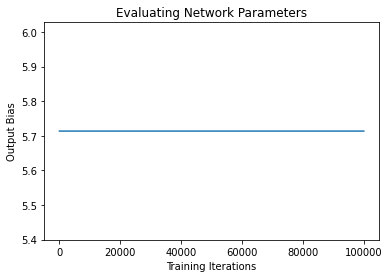

In [5]:
import matplotlib.pyplot as plt

X,Y = create_XOR_data()
N = len(X[0])

N_1 = 10

NN = NeuralNetwork(N, N_1, Question=3)

n = 100_000
bias = np.zeros(n)
for i in range(n):
  NN.update_params(X,Y, lr=0.1)
  #Save the bias for plotting
  bias[i] = NN.b[0,0]

plt.title('Evaluating Network Parameters')
plt.xlabel('Training Iterations')
plt.ylabel('Output Bias')
plt.plot([i for i in range(n)], bias)
plt.show()

As we can see from the plot above: the bias at the output layer remains constant across all training iterations. This is due to the gradient of the cost function being 0 when the network weights are large.

All the derivatives of the cost function include the term:

$$2(f(X)-y)f(X)(1-f(X))$$

And since:

$$\lim_{x \to +\infty} \sigma(x) = 1$$

This means that:

$$ 1 - f(X) = 0 $$ 

Our Neural Network predictions for f(X) is ~1, since the output of our hidden layer is extremely large due to the weights being initialized to >5. After passing this through the sigmoid activation function, we get the prediction that f(X)=1, which kills off the gradient decent operations.

In short, the Neural Network with large initialized weights, since the activation function kills off any gradient descent when it is passed large values. This happens after the first iteration, so the parameters never get updated, so no optimization (and thus learning) takes place.

### Proof of the above explanation

In [7]:
NN = NeuralNetwork(N=2, N_1=15, Question=3)

print('Before any optimization can take place:\n\nf(X) =')
print(NN.f(X))
print('\nTherefore, no gradient descent, nor learning, can occur.')

Before any optimization can take place:

f(X) =
[[1.]
 [1.]
 [1.]
 [1.]]

Therefore, no gradient descent, nor learning, can occur.
